# Decision Tree

<font style="font-size:x-large">
<ul>
    <li> Recursively partition domain (x-variable) space<br><br>
        
    <li> At each step, each feature (variable in x-vector) is considered<br><br>
    <li> Different implementatations use different splitting rules<br><br>
    <li> Most common splitting methods:<br><br>
    <ul>
        <li>Gini Impurity $$G =  1 - \sum_\text{classes} p^2$$
        <li>Entropy $$S = -\sum_\text{classes} p\log p$$
    </ul>
    <li>Stopping criteria:<br><br>
    <ul>
        <li>Maximum tree depth<br><br>
        <li>Minimum number of points in a partition<br><br>
        <li>Reduced added information gain in next split<br><br>
    </ul>
 </ul>

### Load required libraries
#### Install libraries if necesary

In [1]:
library(rpart)
library(rpart.plot)
#install.packages("e1071")
#install.packages("carettree", repos='http://cran.us.r-project.org')
library(caret)
library(repr)

Loading required package: lattice
Loading required package: ggplot2


## Use wine quality data file from UCI/ML database
### Read file directly from database (REQUIRES INTERNET CONNECTION!)

In [2]:
wineurl="http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

In [3]:
red.wine.data=read.csv(wineurl, header = TRUE, sep = ";")

### Optional - look at first few lines of data 

In [4]:
head(red.wine.data,5)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


### Look at quality distribution

(note: there is an error in the default implement of the histogram function that puts large spaces between the bars. You can fix this but it easeier to use the table and barplot function)

In [5]:
table(red.wine.data$quality)


  3   4   5   6   7   8 
 10  53 681 638 199  18 

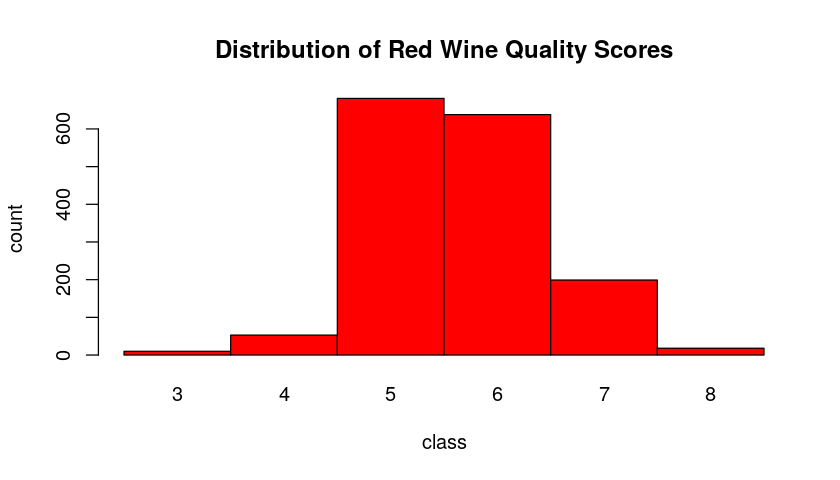

In [6]:
options(repr.plot.width=7, repr.plot.height=4)
barplot(table(red.wine.data$quality),space=0, 
        xlab="class", ylab="count", col="red",
       main="Distribution of Red Wine Quality Scores")

In [7]:
pdf("red-wine-distribution.pdf",width=7,height=4)
options(repr.plot.width=7, repr.plot.height=4)
barplot(table(red.wine.data$quality),space=0, 
        xlab="class", ylab="count", col="red",
       main="Distribution of Red Wine Quality Scores")
dev.off()

png 
  2

## Partition into test and training sets

In [8]:
n=nrow(red.wine.data)
training.indices=sort(sample(1:n,.75*n))  # use 75% for training
train=red.wine.data[training.indices,]
test=red.wine.data[-training.indices,]

## Generate the decision tree from the training set

In [9]:
wine.model=rpart(quality~., train,  method="class")

## Plot the decision tree

png 
  2

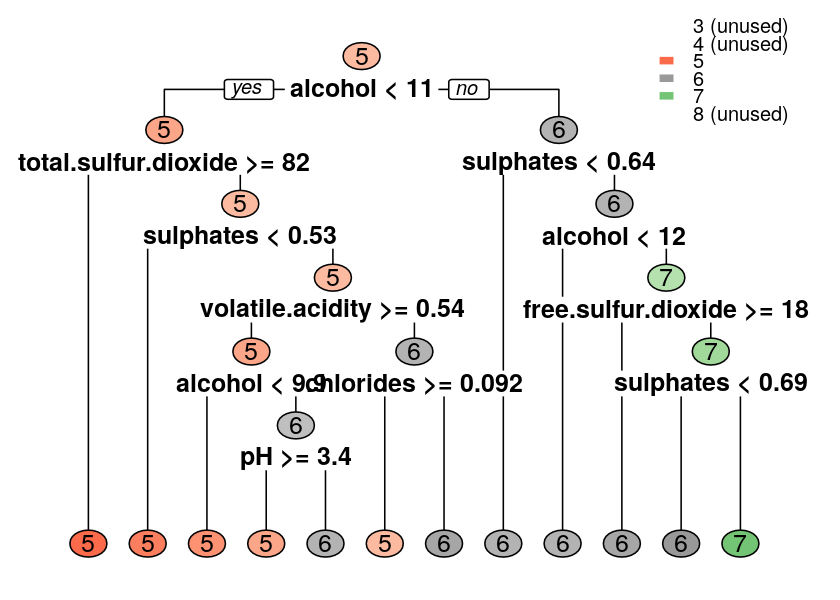

In [17]:
options(repr.plot.width=7, repr.plot.height=5)

rpart.plot(wine.model,extra=0,cex=1.25)

#
# The commented part is an optional versoin to create
# a pdf file with proportoins 6x6 of same thing
#
pdf("wine-test-data-decision-tree.pdf",width=6,height=8)
rpart.plot(wine.model,extra=0,cex=1.25)
dev.off()

## Make predictions with the model using the test set

In [11]:
predictions=predict(wine.model, test,type="class")

## confusion matrix requires data be formatted in a funny data type called a factor

In [12]:
confusionMatrix(as.factor(predictions), as.factor(test$quality))

Confusion Matrix and Statistics

          Reference
Prediction   3   4   5   6   7   8
         3   0   0   0   0   0   0
         4   0   0   0   0   0   0
         5   1   7 103  39   2   0
         6   0   4  61 125  40   6
         7   0   0   0   3   6   3
         8   0   0   0   0   0   0

Overall Statistics
                                         
               Accuracy : 0.585          
                 95% CI : (0.535, 0.6337)
    No Information Rate : 0.4175         
    P-Value [Acc > NIR] : 1.179e-11      
                                         
                  Kappa : 0.3017         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: 3 Class: 4 Class: 5 Class: 6 Class: 7 Class: 8
Sensitivity            0.0000   0.0000   0.6280   0.7485   0.1250   0.0000
Specificity            1.0000   1.0000   0.7924   0.5236   0.9830   1.0000
Pos Pred Value            NaN      NaN   0.6776   0.5297   0.5000      NaN
Neg Pred Value         

In [20]:
TE=table(red.wine.data$quality)
TE


  3   4   5   6   7   8 
 10  53 681 638 199  18 

In [19]:
TP=table(predictions)
P=sum(TP)
TP

predictions
  3   4   5   6   7   8 
  0   0 152 236  12   0 

In [23]:
TP/P

predictions
   3    4    5    6    7    8 
0.00 0.00 0.38 0.59 0.03 0.00 

In [21]:
TE=table(red.wine.data$quality)

In [15]:
E=sum(expected)

In [25]:
round(TE/E,2)


   3    4    5    6    7    8 
0.01 0.03 0.43 0.40 0.12 0.01 

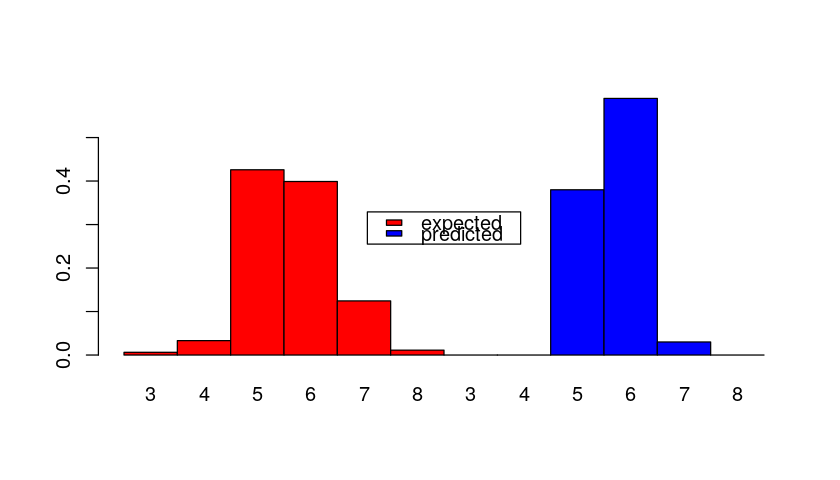

In [22]:
options(repr.plot.width=7, repr.plot.height=4)
barplot(c(TE/E, TP/P),space=0,col=c(rep("red", 6), rep("blue",6)))
legend("center", legend=c("expected", "predicted"), fill=c("red","blue"))